In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from util import process_file
from typing import Type
from peak_shave_sim import PeakShaveSim
from peak_shave_sim import ConstLimPeakShaveSim
from peak_shave_sim import DynamicLimPeakShaveSim
from peak_shave_sim import EqualizedLimPeakShaveSim
from greedy import GreedySim

FILENAME = '../data/Sub71125.csv'
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 600

In [34]:
liion_cnt = 3
flywh_cnt = 3
sucap_cnt = 3
margin = .05
lookahead = 24

In [35]:
df = process_file(FILENAME)
config = {
    'delta_limit': 1,
    'LiIonBattery': liion_cnt,
    'Flywheel': flywh_cnt,
    'Supercapacitor': sucap_cnt
}

In [56]:
def plot(SimClass: Type[PeakShaveSim], config: dict, df: pd.DataFrame, **kwargs) -> None:
    sim = SimClass(config, df)
    costs, metrics, powers = sim.run(**kwargs)
    columns = None
    limit_mode = (len(powers[0]) == 6)
    if limit_mode:
        columns = ['timestamp', 'pnet', 'pbought', 'soc', 'lower', 'upper']
    else:
        columns = ['timestamp', 'pnet', 'pbought', 'soc']
    powers = pd.DataFrame(powers, columns=columns)

    _, axes = plt.subplots(2, 1, sharex=True)

    axes[0].plot(powers['timestamp'], powers['pnet'], linewidth=.5, label='pnet')
    axes[0].plot(powers['timestamp'], powers['pbought'], linewidth=1, label='pbought')
    if limit_mode:
        axes[0].plot(powers['timestamp'], powers['upper'], linewidth=1, label='upper')
        axes[0].plot(powers['timestamp'], powers['lower'], linewidth=1, label='lower')
    axes[1].plot(powers['timestamp'], powers['soc'], linewidth=.5)

    start = powers.iloc[2500]['timestamp']
    end = powers.iloc[3000]['timestamp']
    plt.xlim(start, end)

    axes[0].legend()

    if SimClass == ConstLimPeakShaveSim:
        axes[0].set_title('Constant limits')
    elif SimClass == DynamicLimPeakShaveSim:
        axes[0].set_title('Dynamic limits (median based)')
    elif SimClass == EqualizedLimPeakShaveSim:
        axes[0].set_title('Equalized limits')
    elif SimClass == GreedySim:
        axes[0].set_title('Greedy')

    axes[0].set_ylabel('electricity (kWh)')
    axes[1].set_ylabel('state-of-charge (kWh)')

batteries.py: EnergyHub initialized with config: {'delta_limit': 1, 'LiIonBattery': 3, 'Flywheel': 3, 'Supercapacitor': 3}
batteries.py: EnergyHub initialized with config: {'delta_limit': 1, 'LiIonBattery': 3, 'Flywheel': 3, 'Supercapacitor': 3}
batteries.py: EnergyHub initialized with config: {'delta_limit': 1, 'LiIonBattery': 3, 'Flywheel': 3, 'Supercapacitor': 3}
batteries.py: EnergyHub initialized with config: {'delta_limit': 1, 'LiIonBattery': 3, 'Flywheel': 3, 'Supercapacitor': 3}


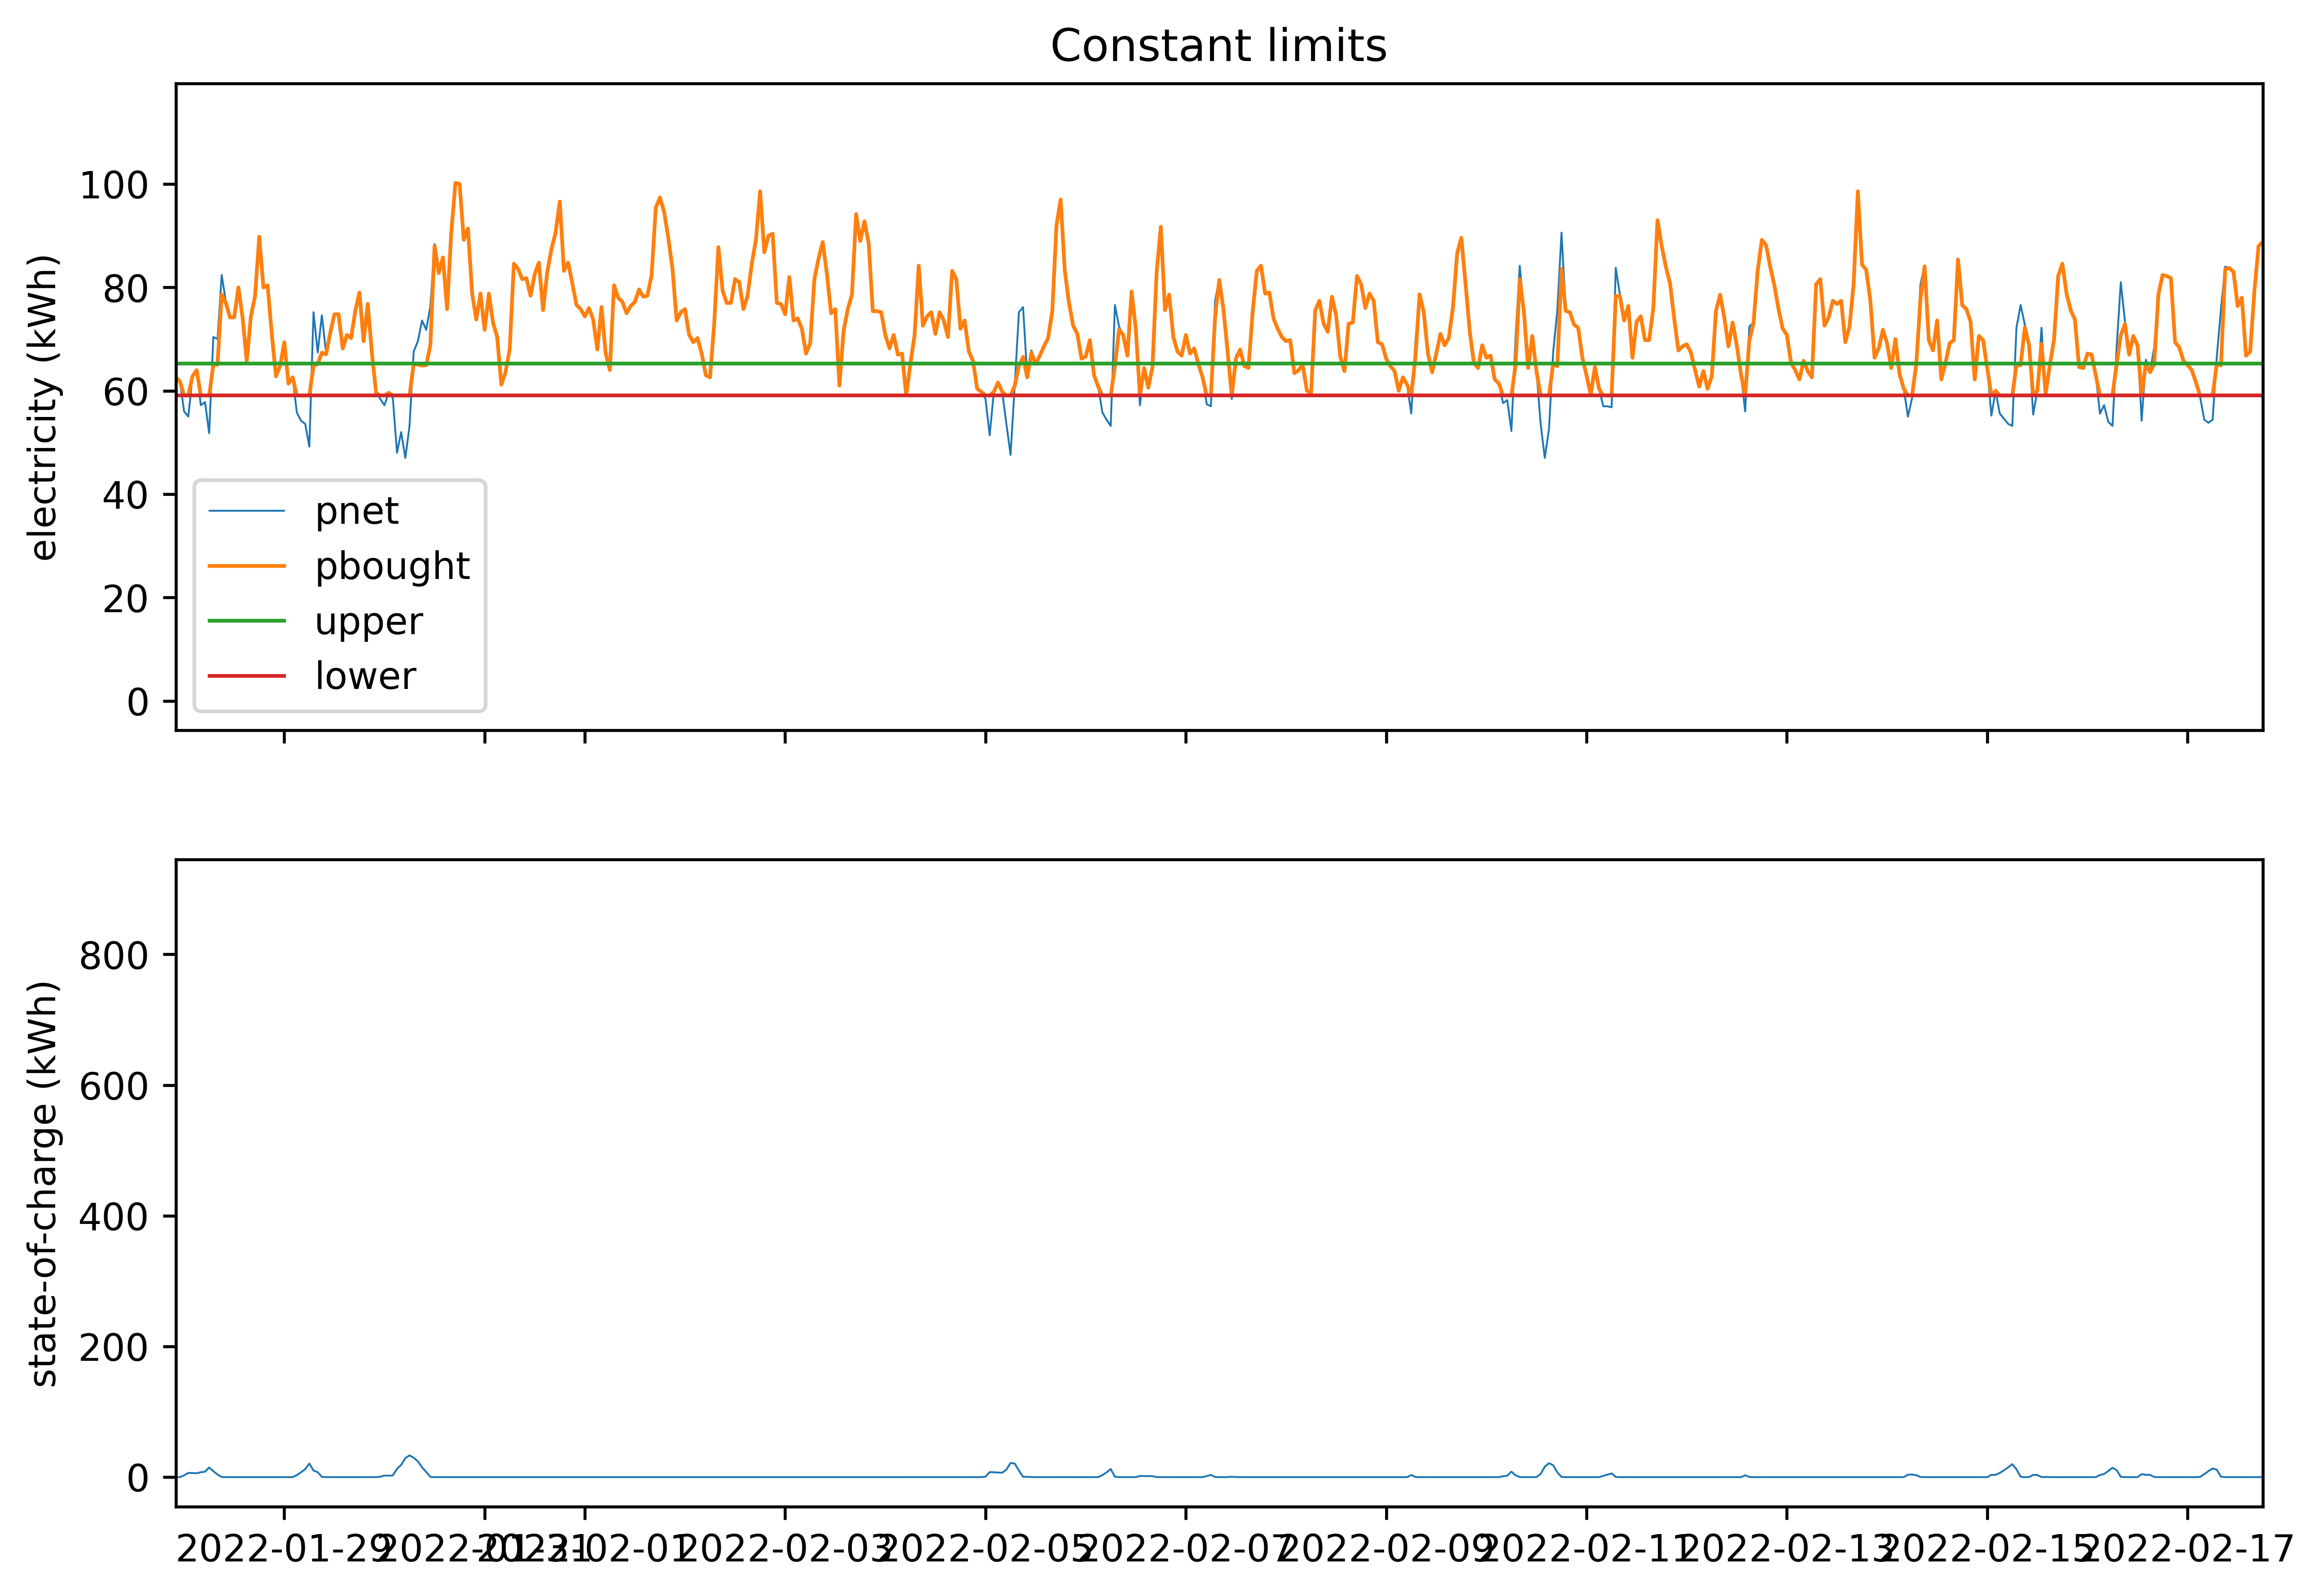

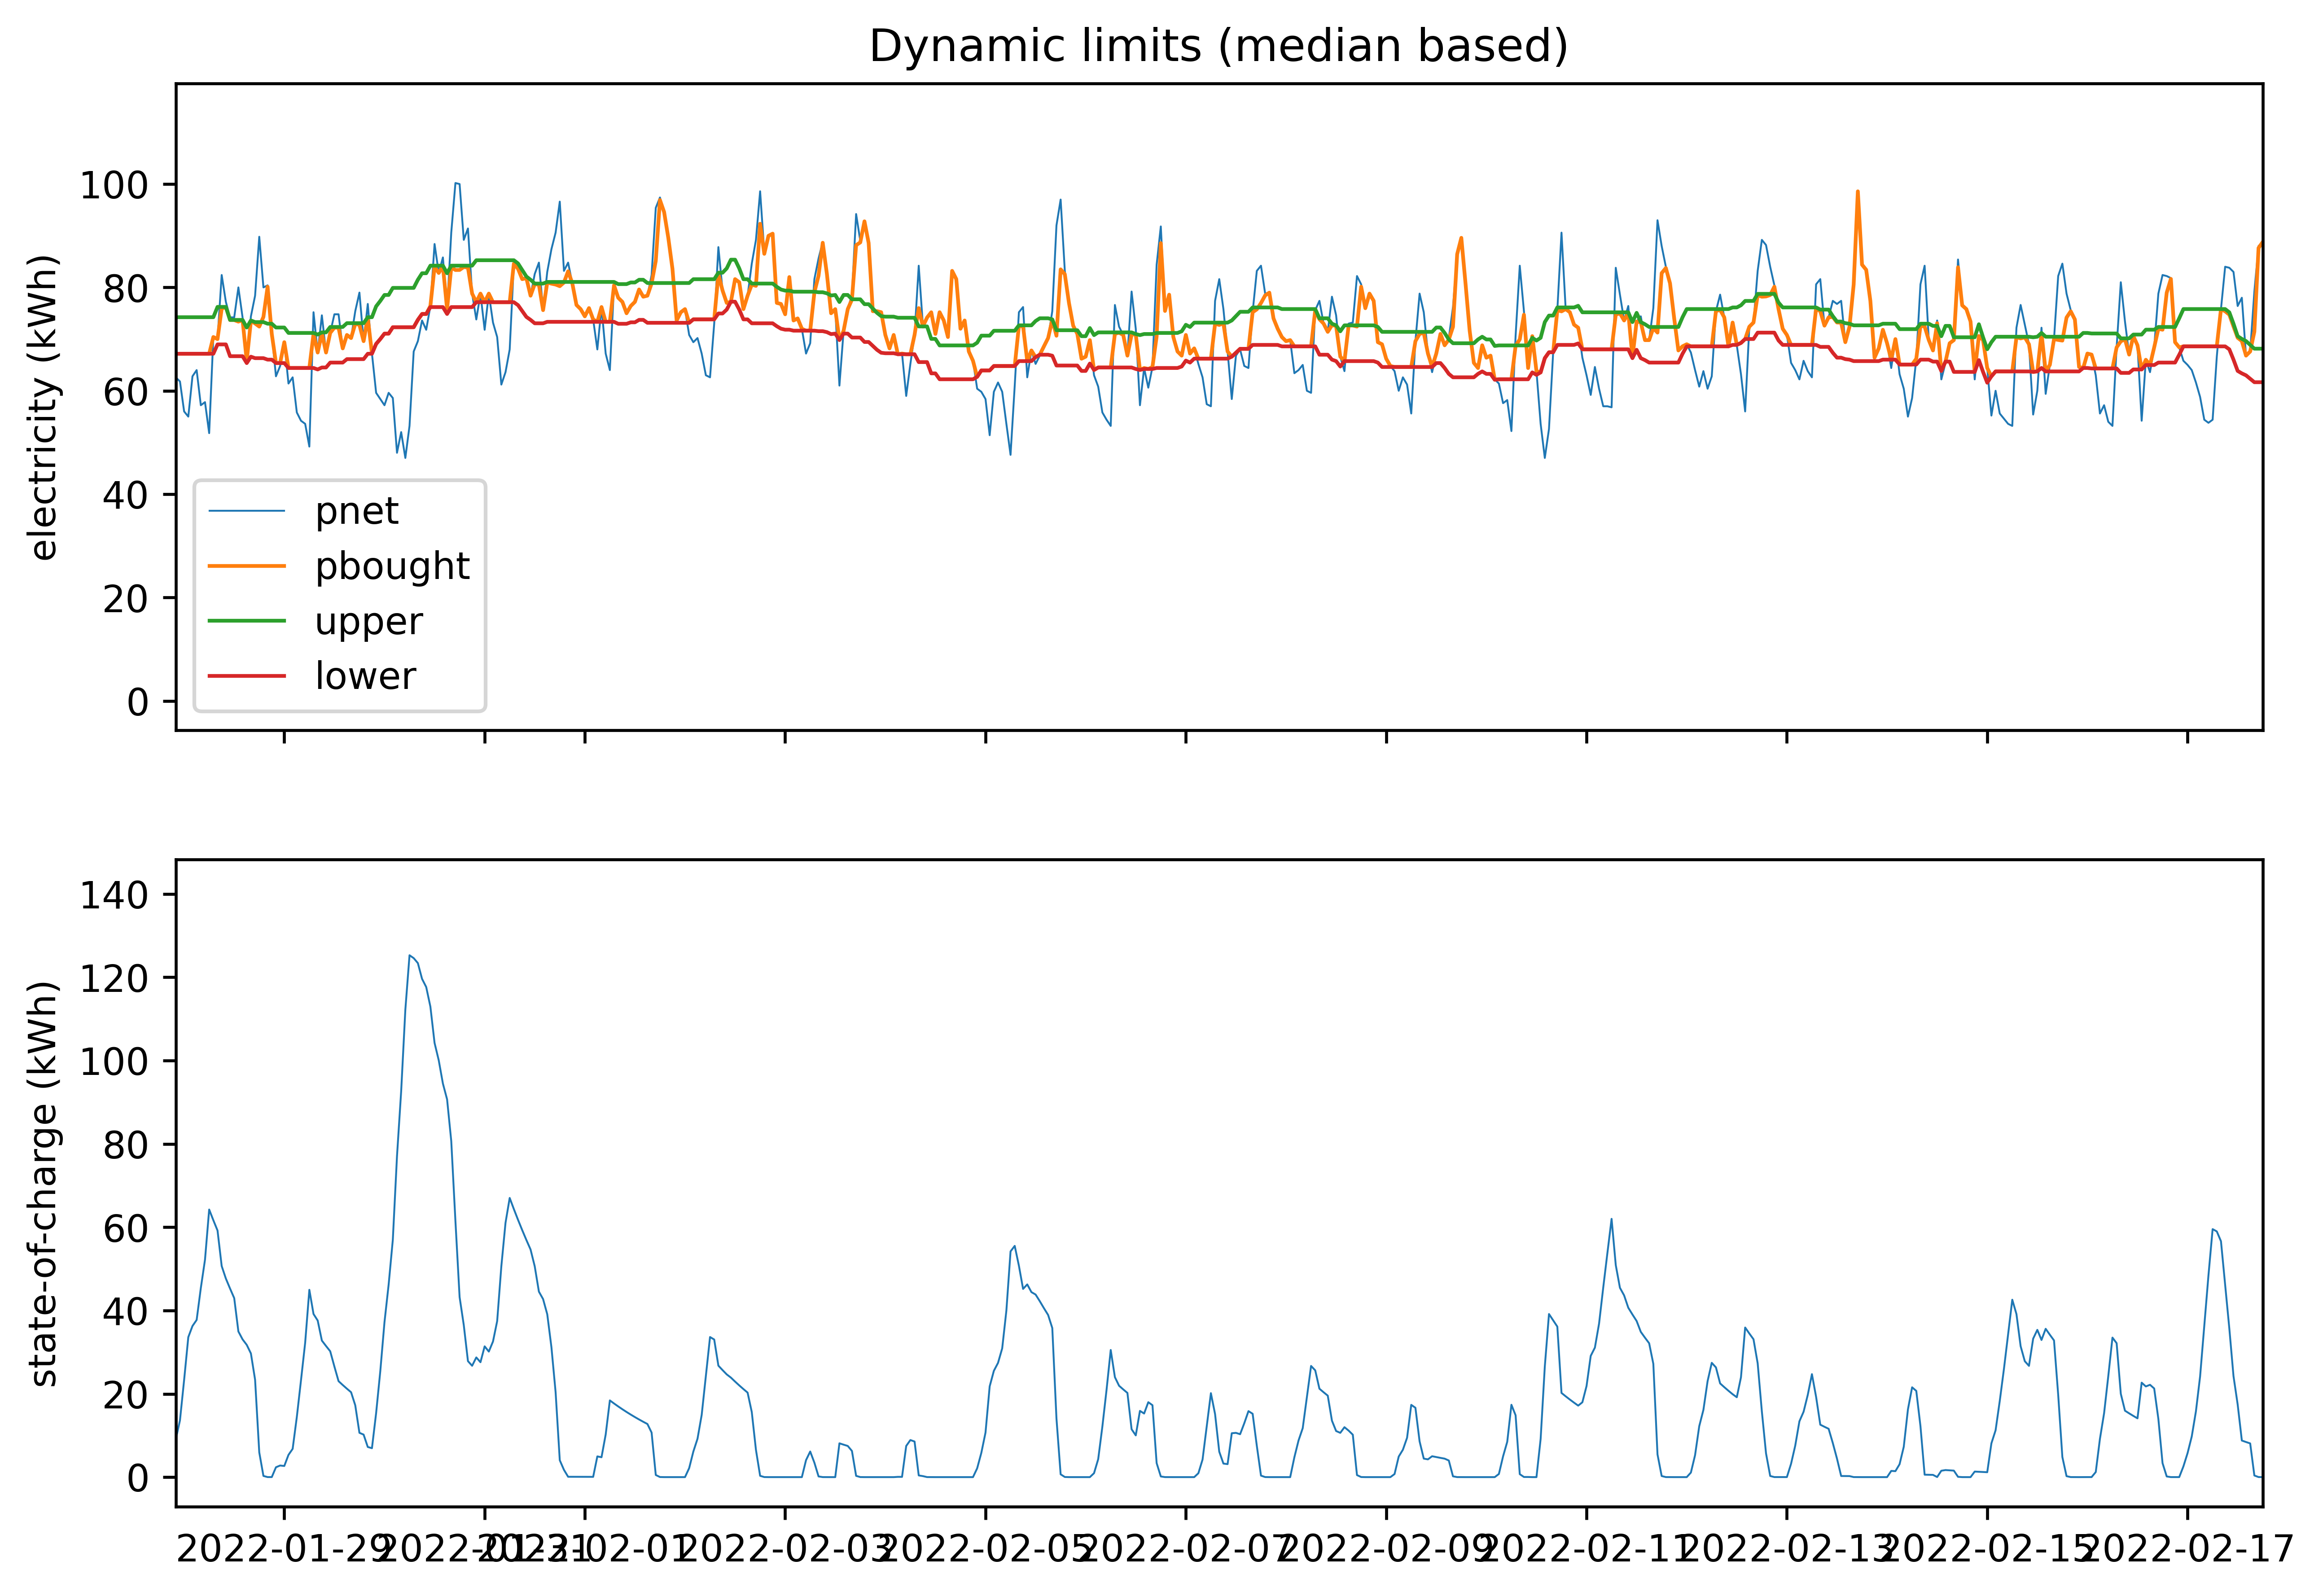

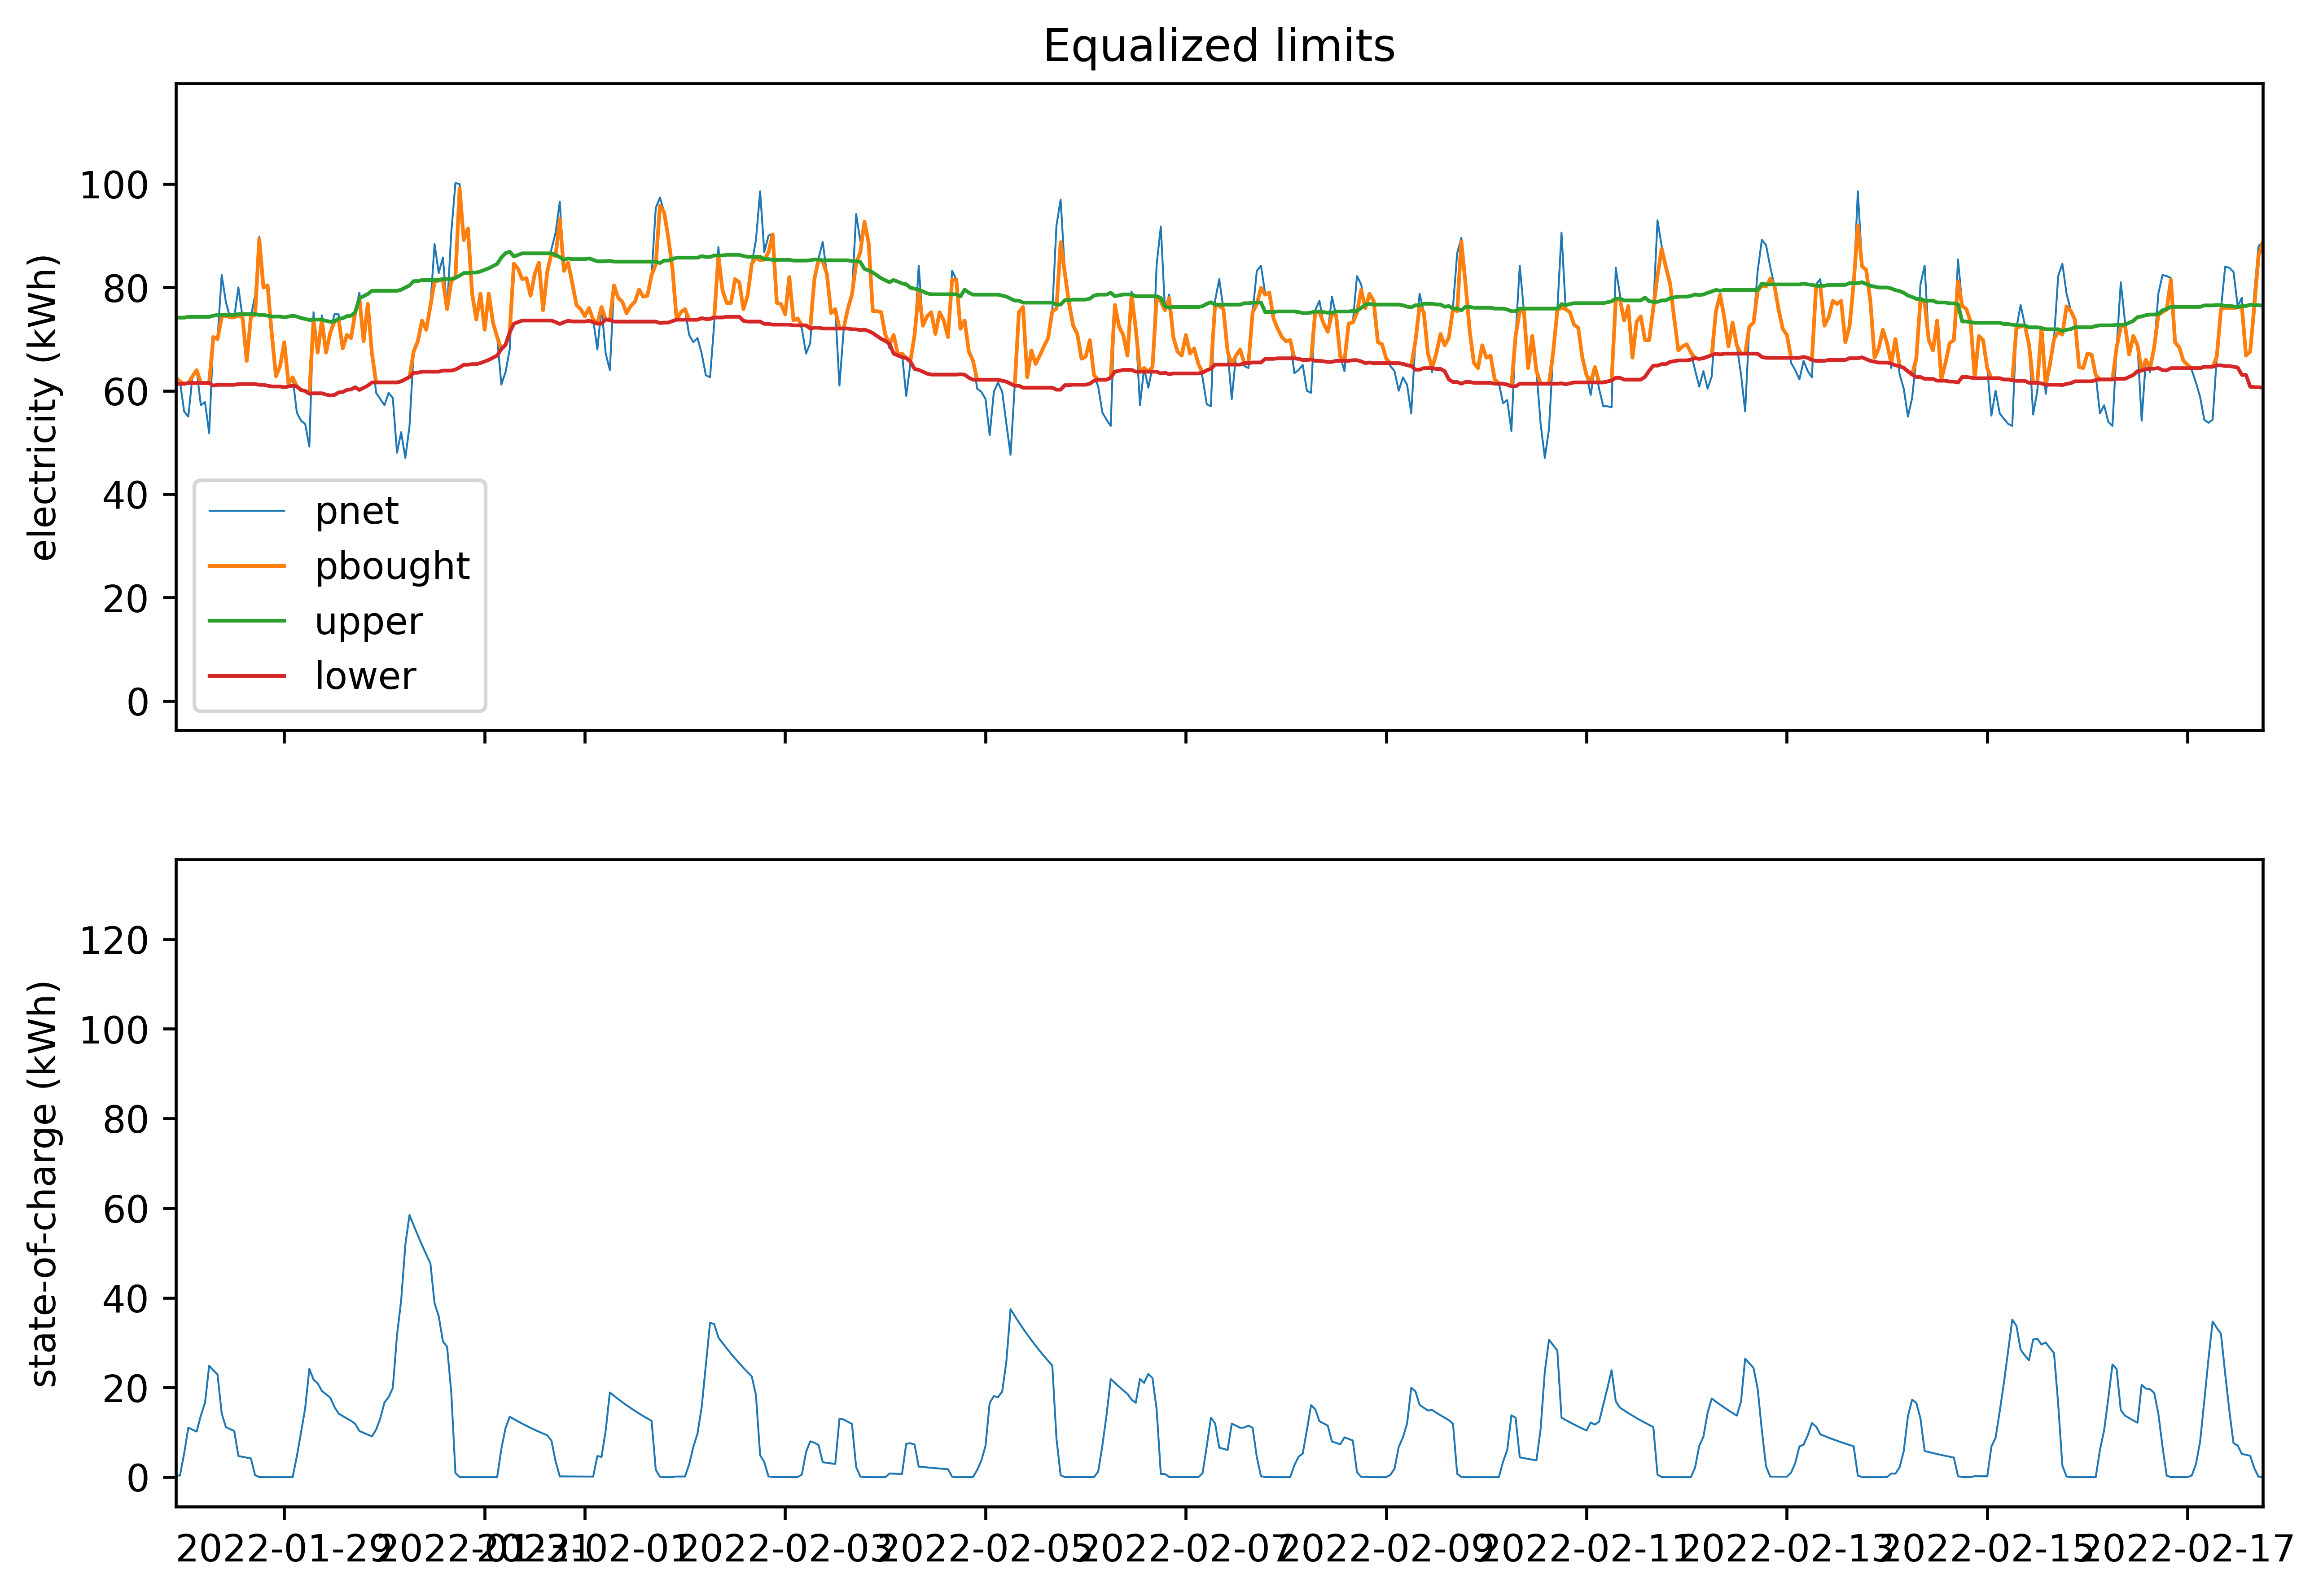

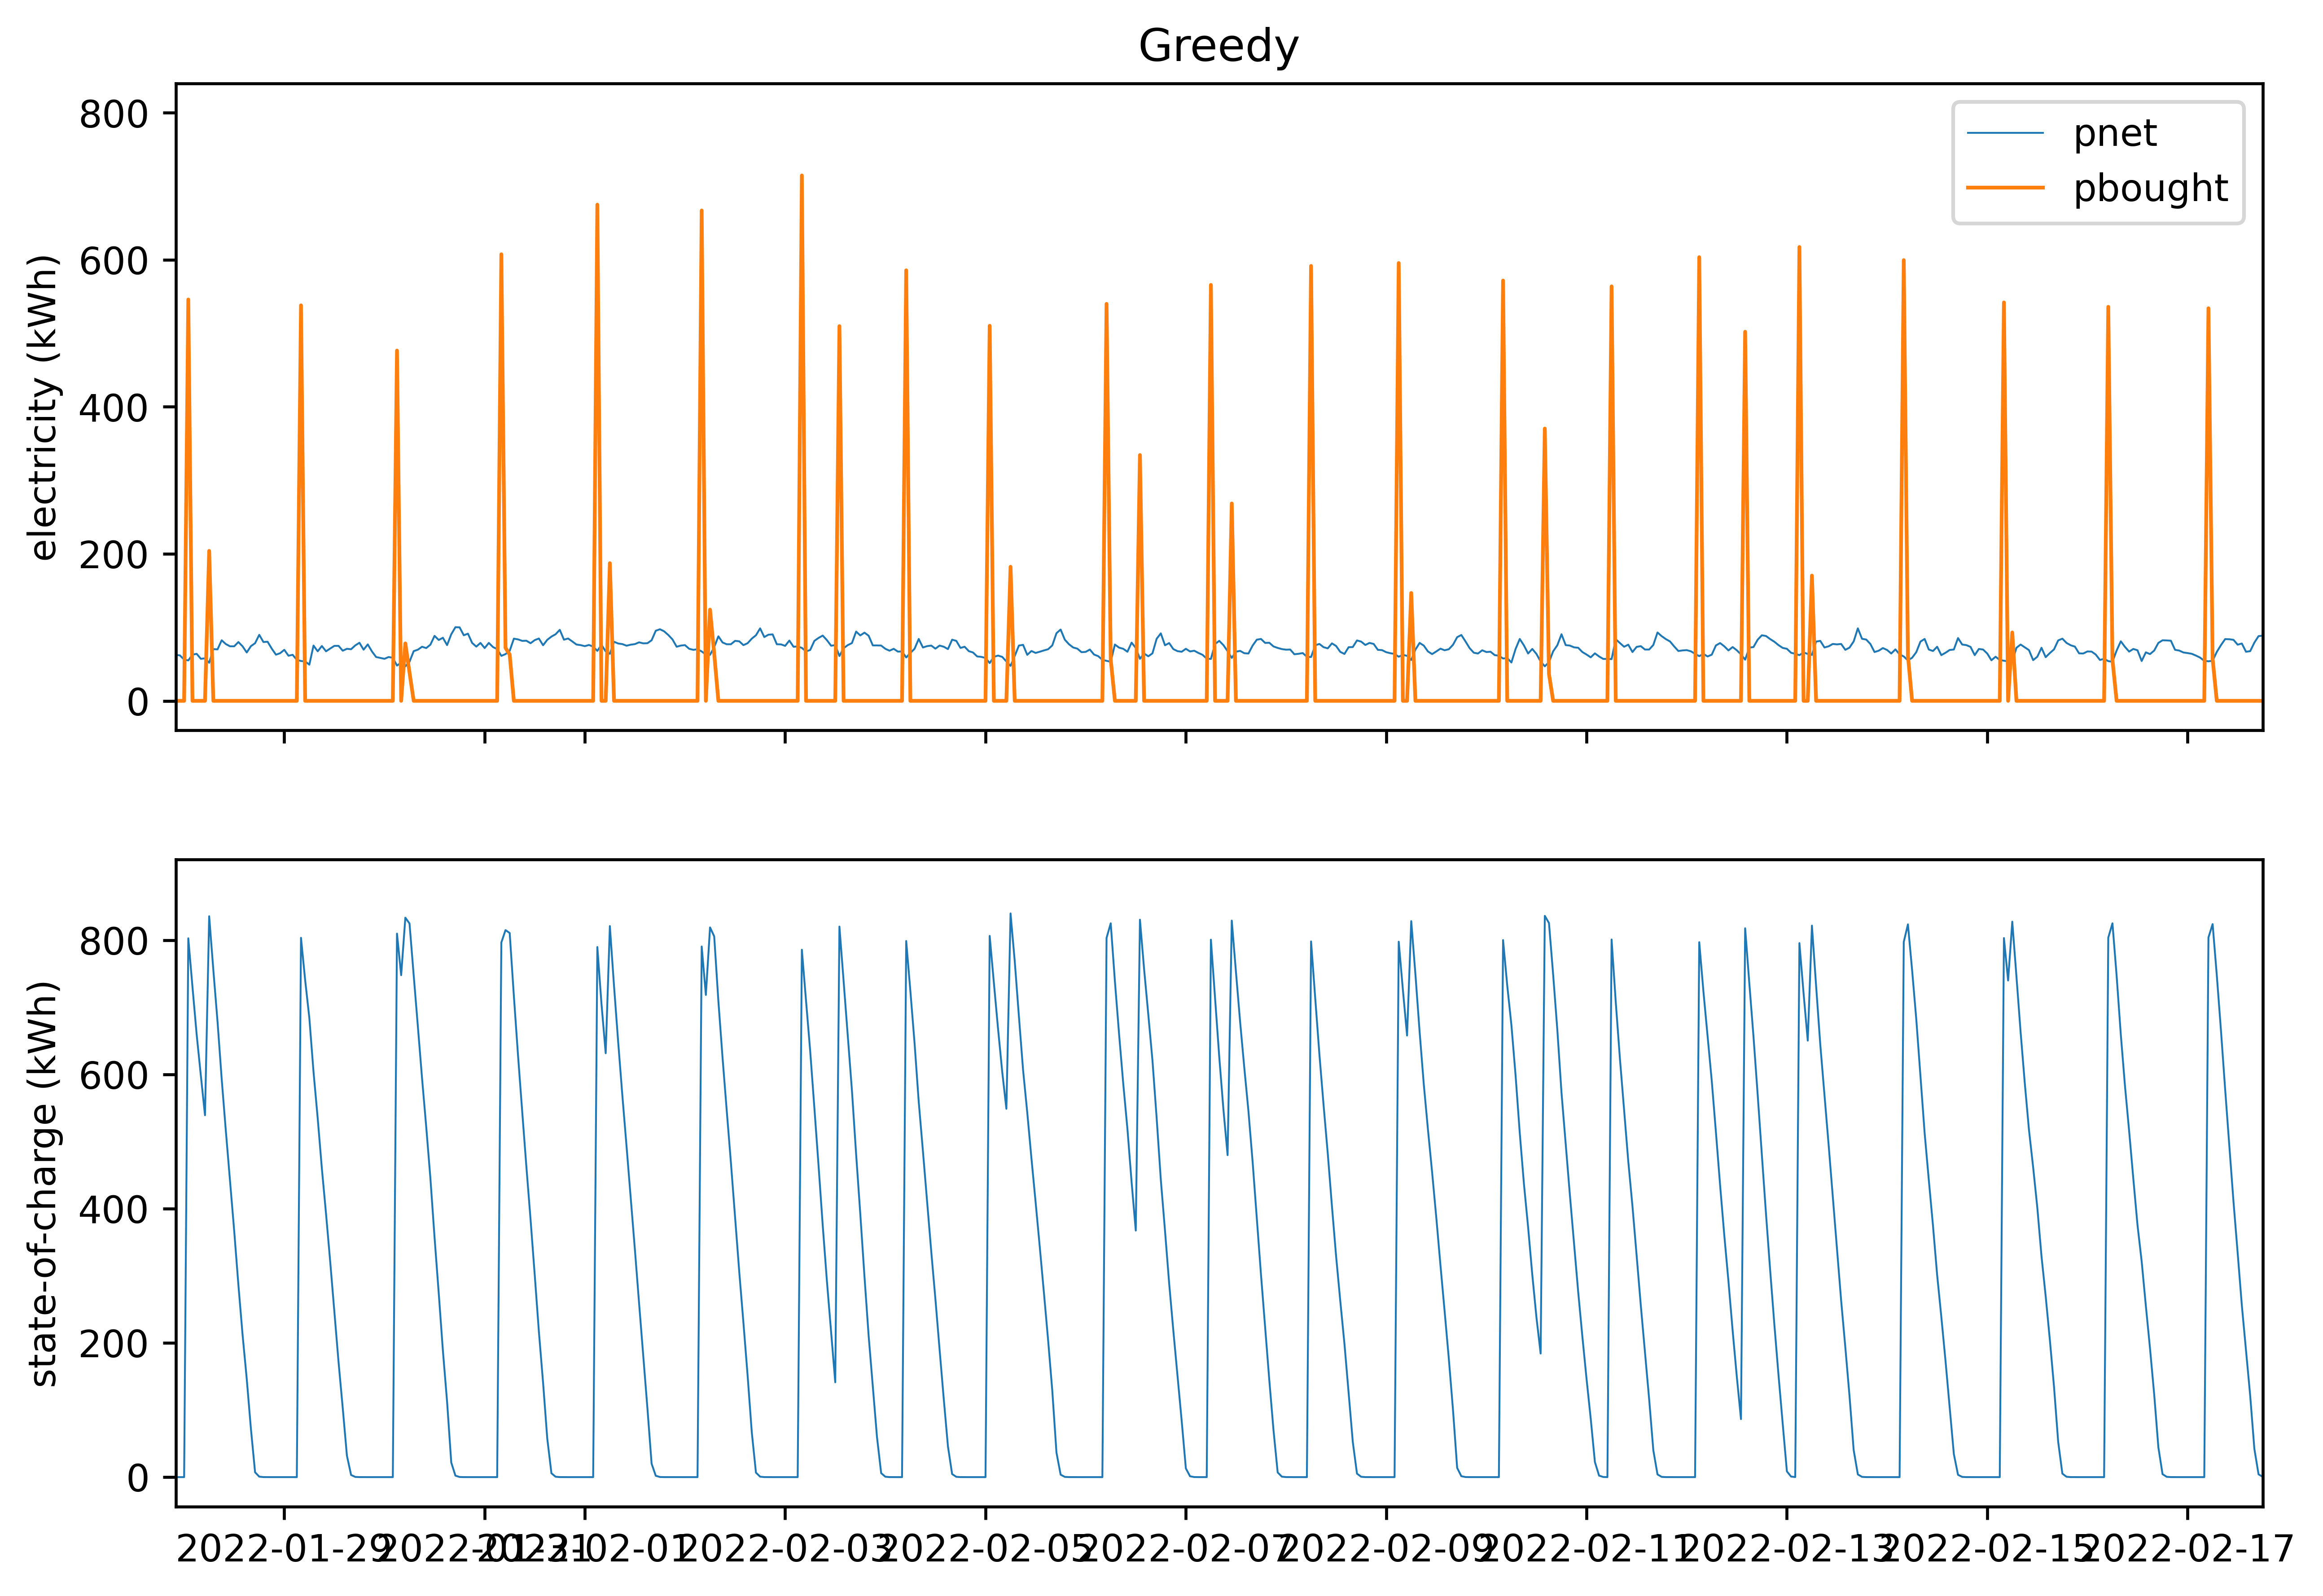

In [57]:
plot(ConstLimPeakShaveSim, config, df, margin=margin, penalize_charging=True, create_log=True)
plot(DynamicLimPeakShaveSim, config, df, margin=margin, lookahead=lookahead, penalize_charging=True, create_log=True)
plot(EqualizedLimPeakShaveSim, config, df, lookahead=lookahead, penalize_charging=True, create_log=True)
plot(GreedySim, config, df, penalize_charging=True, create_log=True)